In [1]:
from scipy.stats import distributions
import numpy as np
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats


# Q1：Interpretation of QQ plot

## (a) Distribution A - light-tailed

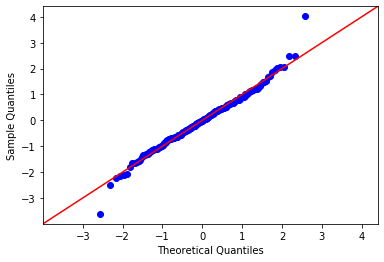

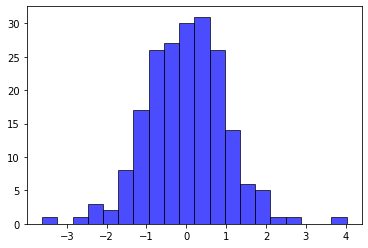

In [2]:
# a. distribution A (student_t distribution) with light-tailed
samplesA = np.random.standard_t(23, size=200)


# normalize the data
mu_hat = (1/len(samplesA)) * sum(samplesA)
mu_hat
sigma_hat_square = (1/(len(samplesA)-1)) * sum([(x_i - mu_hat)**2 for x_i in samplesA])
sigma_hat_square

normalized_samplesA = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in samplesA]

# distribution A - QQ plot
fig = sm.qqplot(np.array(normalized_samplesA), line='45', dist=distributions.norm)
plt.show()

# distribution A - histogram
plt.hist(normalized_samplesA, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()


## (b) Distribution B - left-skew

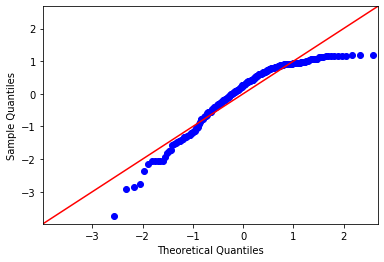

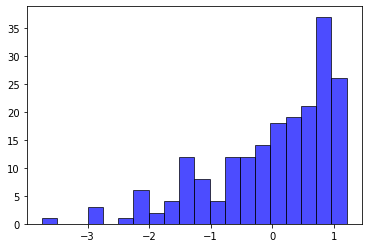

In [3]:
# b. distribution B (power(5) distribution) with left-skew
samplesB = np.random.power(5, size=200)


# normalize the data
mu_hat = (1/len(samplesB)) * sum(samplesB)
mu_hat
sigma_hat_square = (1/(len(samplesB)-1)) * sum([(x_i - mu_hat)**2 for x_i in samplesB])
sigma_hat_square

normalized_samplesB = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in samplesB]

# distribution B - QQ plot
fig = sm.qqplot(np.array(normalized_samplesB), line='45', dist=distributions.norm)
plt.show()

# distribution B - histogram
plt.hist(normalized_samplesB, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()


## (c) Distribution C - normal

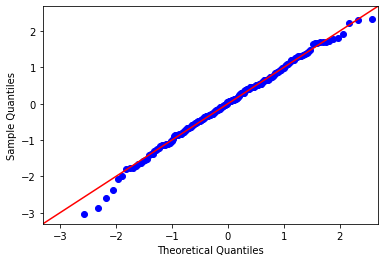

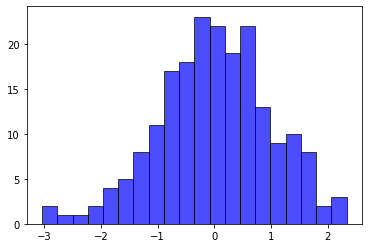

In [34]:
# c. distribution C (normal(0,2) distribution) normal
samplesC = np.random.normal(0, 2, size=200)


# normalize the data
mu_hat = (1/len(samplesC)) * sum(samplesC)
mu_hat
sigma_hat_square = (1/(len(samplesC)-1)) * sum([(x_i - mu_hat)**2 for x_i in samplesC])
sigma_hat_square

normalized_samplesC = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in samplesC]

# distribution C - QQ plot
fig = sm.qqplot(np.array(normalized_samplesC), line='45', dist=distributions.norm)
plt.show()

# distribution C - histogram
plt.hist(normalized_samplesC, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()


## (d) Distribution D - bimodal

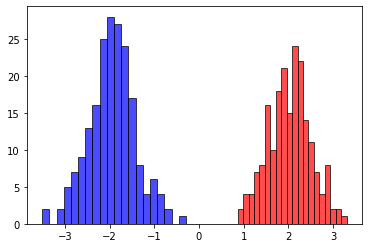

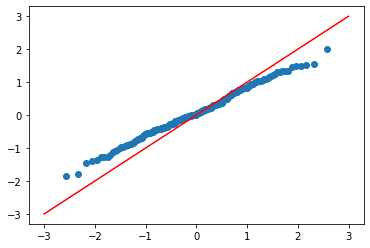

In [5]:
# d. distribution D with bimodal
samplesD1 = np.random.normal(2, 0.5, size=200)
samplesD2 = np.random.normal(-2, 0.5, size=200)


# distribution D - histogram
plt.hist(samplesD1, bins=20, density=0, facecolor="red", edgecolor="black", alpha=0.7)
plt.hist(samplesD2, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

# distribution D - QQ plot
samplesD = np.array(samplesD1) + np.array(samplesD2)
sorted_samplesD = np.sort(samplesD)

yvals = np.arange(len(samplesD))/float(len(samplesD))
x_label = stats.norm.ppf(yvals)

X = (-3,3)
Y = (-3,3)
plt.plot(X,Y, c='r')

plt.scatter(x_label, sorted_samplesD)


## (e) Distribution E - heavy-tailed

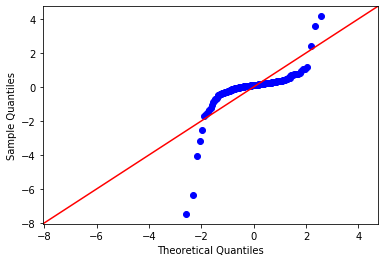

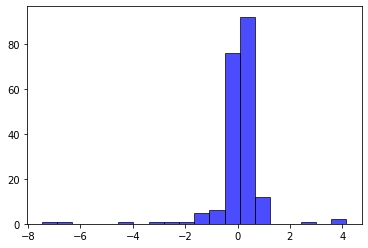

In [6]:
# e. distribution E (student_cauchy distribution) with heavy-tailed
samplesE = np.random.standard_cauchy(size=200)


# normalize the data
mu_hat = (1/len(samplesE)) * sum(samplesE)
mu_hat
sigma_hat_square = (1/(len(samplesE)-1)) * sum([(x_i - mu_hat)**2 for x_i in samplesE])
sigma_hat_square

normalized_samplesE = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in samplesE]

# distribution E - QQ plot
fig = sm.qqplot(np.array(normalized_samplesE), line='45', dist=distributions.norm)
plt.show()

# distribution E - histogram
plt.hist(normalized_samplesE, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()


## (f) Distribution F - right-skew

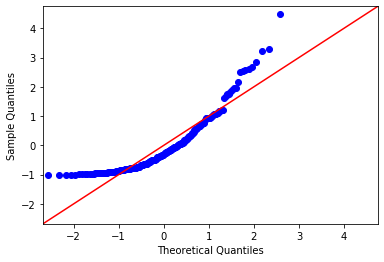

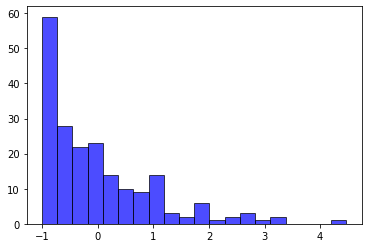

In [7]:
# f. distribution F (exponential(0.2) distribution) with right-skew
samplesF = np.random.exponential(0.2, size=200)


# normalize the data
mu_hat = (1/len(samplesF)) * sum(samplesF)
mu_hat
sigma_hat_square = (1/(len(samplesF)-1)) * sum([(x_i - mu_hat)**2 for x_i in samplesF])
sigma_hat_square

normalized_samplesF = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in samplesF]

# distribution F - QQ plot
fig = sm.qqplot(np.array(normalized_samplesF), line='45', dist=distributions.norm)
plt.show()

# distribution F - histogram
plt.hist(normalized_samplesF, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

# Q2: The F(p,n-p) distibution: some equivalent definitions

### Four distributions and their QQ plot against the theoretical quantiles of the F(p,n-p) distribution.

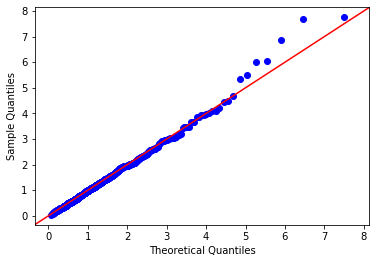

In [36]:
# Considering the following four distributions:

# distribution1: Fp,n-p distribution with mu1, Sigma1, with QQ plot against the theoretical quantiles  of the Fp,n−p distribution.
n = 20
p = 7
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1

fig = sm.qqplot(np.array(coppies_of_distribution1), line='45', dist=distributions.f, distargs=(p,n-p, ))
plt.show()


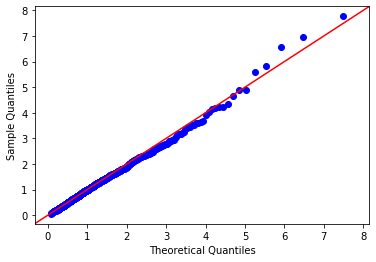

In [9]:
# distribution2: Fp,n-p distribution with mu2, Sigma2, with QQ plot against the theoretical quantiles  of the Fp,n−p distribution.
n = 20
p = 7
mu2 = np.array([0, 1, 0, 1, 0, 1, 0])
Sigma2 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 3., 1., 1., 1., 1., 1.], \
                   [1., 1., 3., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 3., 1., 1.], \
                   [1., 1., 1., 1., 1., 3., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution2 = []

for s in range(k):
    
    data2 = np.random.multivariate_normal(mu2, Sigma2, size=n)
    data2

    mu_hat2 = np.average(data2, axis=0)
    mu_hat2
    
    S2 = np.zeros_like(Sigma2)
    for i in range(n):
        x_i = data2[i,:]
        x_i - mu_hat2
        S2 += (1/(n-1))* np.outer(x_i - mu_hat2, x_i - mu_hat2)
    S2

   
    distribution2 = (((n-p)*n)/((n-1)*p))*(mu_hat2 - mu2).T @ np.linalg.inv(S2) @ (mu_hat2 - mu2)
   
    coppies_of_distribution2.append(distribution2)

coppies_of_distribution2

fig = sm.qqplot(np.array(coppies_of_distribution2), line='45', dist=distributions.f, distargs=(p,n-p, ))
plt.show()

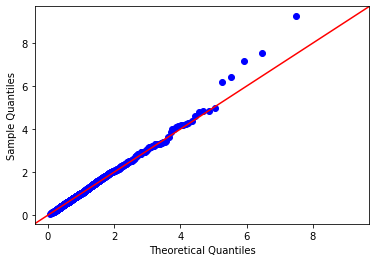

In [10]:
# distribution3: z_i ~ N(0,1), z_0 ... z_n-1 are iid normal dist N(0, I(p*p)) with QQ plot against the theoretical quantiles  of the Fp,n−p distribution.
n = 20
p = 7
mu3 = np.array([0, 0, 0, 0, 0, 0, 0])
Sigma3 = np.identity(p)

k = 1000
coppies_of_distribution3 = []

for s in range(k):
    
    data3 = np.random.multivariate_normal(mu3, Sigma3, size=n)
    data3
    
    
    z_i = data3[1:,:]
    z_0 = data3[0]
    sum_z = np.zeros_like(Sigma3)
    for i in range(n-1):
        z_i_1 = z_i[i,:]
        z = np.outer(z_i_1, z_i_1)
        sum_z = sum_z + z
   
    distribution3 = ((n-p)/p)*(z_0).T @ np.linalg.inv(sum_z) @ z_0
   
    coppies_of_distribution3.append(distribution3)

coppies_of_distribution3

fig = sm.qqplot(np.array(coppies_of_distribution3), line='45', dist=distributions.f, distargs=(p,n-p, ))

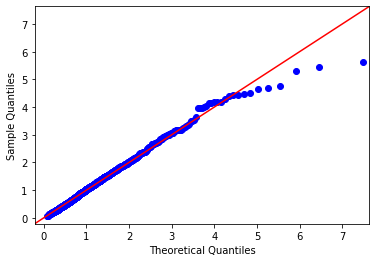

In [11]:
# distribution4: W(chi-square(p)) & W'(chi-square(n-p)) distributions with QQ plot against the theoretical quantiles  of the Fp,n−p distribution.
n = 20
p = 7

k = 1000
coppies_of_distribution4 = []

for s in range(k):
    
    data4_1 = np.random.chisquare(p)
    data4_2 = np.random.chisquare(n-p)
   
    distribution4 = (data4_1/p)/(data4_2/(n-p))
   
    coppies_of_distribution4.append(distribution4)

coppies_of_distribution4

fig = sm.qqplot(np.array(coppies_of_distribution4), line='45', dist=distributions.f, distargs=(p,n-p, ))

### 6 QQ plots of the pairs of above four distributions

In [12]:
## 6 QQ plots of the pairs of above four distributions - verify that the four distributions are the same.
distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
distribution2 = (((n-p)*n)/((n-1)*p))*(mu_hat2 - mu2).T @ np.linalg.inv(S2) @ (mu_hat2 - mu2)
distribution3 = ((n-p)/p)*(z_0).T @ np.linalg.inv(sum_z) @ z_0
distribution4 = (data4_1/p)/(data4_2/(n-p))

# Normalised the data
mu_hat_dist1 = (1/len(coppies_of_distribution1)) * sum(coppies_of_distribution1)
sigma_hat_square_dist1 = (1/(len(coppies_of_distribution1)-1)) * sum([(x_i - mu_hat_dist1)**2 for x_i in coppies_of_distribution1])
normalized_coppies_of_distribution1 = [(x_i - mu_hat_dist1)/sigma_hat_square_dist1**(0.5) for x_i in coppies_of_distribution1]

mu_hat_dist2 = (1/len(coppies_of_distribution2)) * sum(coppies_of_distribution2)
sigma_hat_square_dist2 = (1/(len(coppies_of_distribution2)-1)) * sum([(x_i - mu_hat_dist2)**2 for x_i in coppies_of_distribution2])
normalized_coppies_of_distribution2 = [(x_i - mu_hat_dist2)/sigma_hat_square_dist2**(0.5) for x_i in coppies_of_distribution2]

mu_hat_dist3 = (1/len(coppies_of_distribution3)) * sum(coppies_of_distribution3)
sigma_hat_square_dist3 = (1/(len(coppies_of_distribution3)-1)) * sum([(x_i - mu_hat_dist3)**2 for x_i in coppies_of_distribution3])
normalized_coppies_of_distribution3 = [(x_i - mu_hat_dist3)/sigma_hat_square_dist3**(0.5) for x_i in coppies_of_distribution3]

mu_hat_dist4 = (1/len(coppies_of_distribution4)) * sum(coppies_of_distribution4)
sigma_hat_square_dist4 = (1/(len(coppies_of_distribution4)-1)) * sum([(x_i - mu_hat_dist4)**2 for x_i in coppies_of_distribution4])
normalized_coppies_of_distribution4 = [(x_i - mu_hat_dist4)/sigma_hat_square_dist4**(0.5) for x_i in coppies_of_distribution4]


sorted_normalized_coppies_of_distribution1 = np.sort(normalized_coppies_of_distribution1)
sorted_normalized_coppies_of_distribution2 = np.sort(normalized_coppies_of_distribution2)
sorted_normalized_coppies_of_distribution3 = np.sort(normalized_coppies_of_distribution3)
sorted_normalized_coppies_of_distribution4 = np.sort(normalized_coppies_of_distribution4)


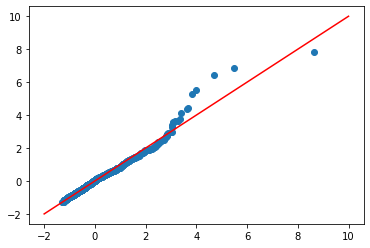

In [13]:
## QQ plot of dist1 vs. dist2

X = (-2,10)
Y = (-2,10)
plt.plot(X,Y, c='r')

plt.scatter(sorted_normalized_coppies_of_distribution1, sorted_normalized_coppies_of_distribution2)


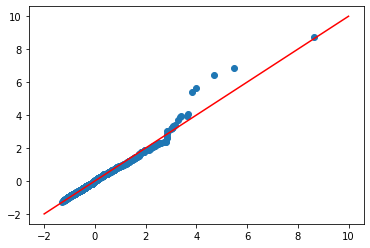

In [14]:
## QQ plot of dist1 vs. dist3

X = (-2,10)
Y = (-2,10)
plt.plot(X,Y, c='r')

plt.scatter(sorted_normalized_coppies_of_distribution1, sorted_normalized_coppies_of_distribution3)


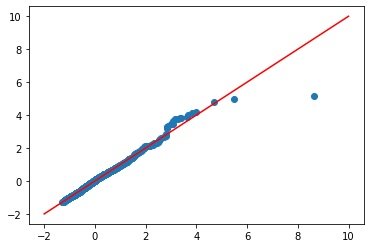

In [15]:
## QQ plot of dist1 vs. dist4

X = (-2,10)
Y = (-2,10)
plt.plot(X,Y, c='r')

plt.scatter(sorted_normalized_coppies_of_distribution1, sorted_normalized_coppies_of_distribution4)


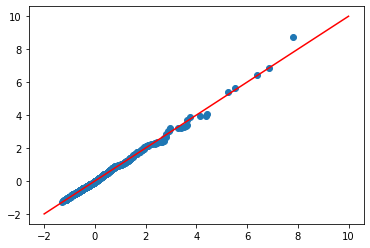

In [16]:
## QQ plot of dist2 vs. dist3

X = (-2,10)
Y = (-2,10)
plt.plot(X,Y, c='r')

plt.scatter(sorted_normalized_coppies_of_distribution2, sorted_normalized_coppies_of_distribution3)


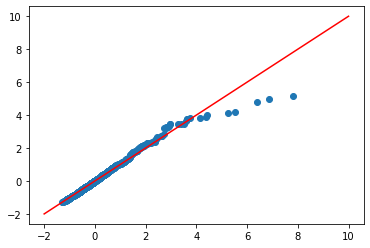

In [17]:
## QQ plot of dist2 vs. dist4

X = (-2,10)
Y = (-2,10)
plt.plot(X,Y, c='r')

plt.scatter(sorted_normalized_coppies_of_distribution2, sorted_normalized_coppies_of_distribution4)


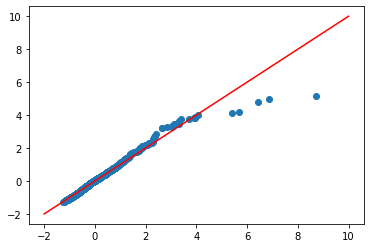

In [18]:
## QQ plot of dist3 vs. dist4

X = (-2,10)
Y = (-2,10)
plt.plot(X,Y, c='r')

plt.scatter(sorted_normalized_coppies_of_distribution3, sorted_normalized_coppies_of_distribution4)


## Conclusion: Comparing all 10 QQ plots we can conclude that the above four distributions are the same.

# Q3: Large n approximation of the Fp,n−p distribution.
## (1) The limit of W′/(n−p) is 1 when n is much larger than p by the therom "the approximation Fp,n−p approximately equal to χ2(p)/p".


## (2) For each value of n ∈ {10, 20, 50, 100, 150, 200, 300},

###    (a) For the value n=10

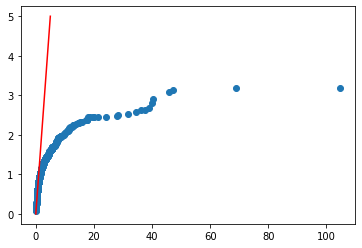

In [19]:
# For the value n=10
n = 10
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)


### (b) For the value n=20

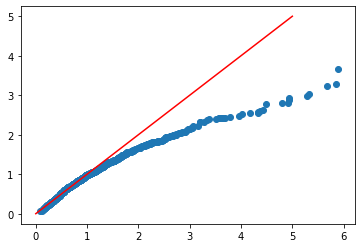

In [20]:
# For the value n=20
n = 20
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)


### (c) For the value n=30

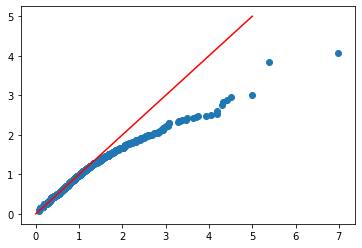

In [21]:
# For the value n=30
n = 30
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)



### (d) For the value n=50

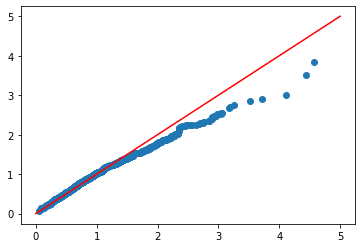

In [22]:
# For the value n=50
n = 50
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)


### (e) For the value n=100

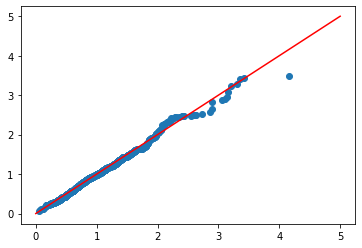

In [23]:
# For the value n=100 - this sample size is the approximation warranted for p = 7
n = 100
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)


### (f) For the value n=150

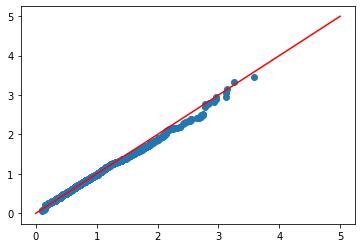

In [24]:
# For the value n=150 
n = 150
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)


### (g) For the value n=200

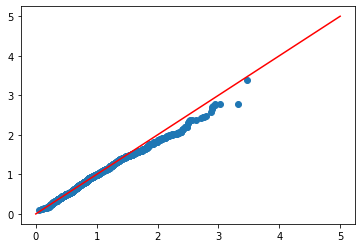

In [25]:
# For the value n=200
n = 200
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)


### (h) For the value n=300

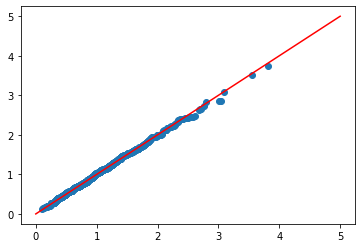

In [26]:
# For the value n=300
n = 300
p = 7

# the first dist of the above four, k=1000 iid rvs.
mu1 = np.array([1, 1, 1, 1, 1, 1, 1])
Sigma1 = np.array([[3., 1., 1., 1., 1., 1., 1.], \
                   [1., 2., 1., 1., 1., 1., 1.], \
                   [1., 1., 2., 1., 1., 1., 1.], \
                   [1., 1., 1., 2., 1., 1., 1.], \
                   [1., 1., 1., 1., 2., 1., 1.], \
                   [1., 1., 1., 1., 1., 2., 1.], \
                   [1., 1., 1., 1., 1., 1., 3.]
                   ])

k = 1000
coppies_of_distribution1 = []

for s in range(k):
    
    data1 = np.random.multivariate_normal(mu1, Sigma1, size=n)
    data1

    mu_hat1 = np.average(data1, axis=0)
    mu_hat1
    
    S1 = np.zeros_like(Sigma1)
    for i in range(n):
        x_i = data1[i,:]
        x_i - mu_hat1
        S1 += (1/(n-1))* np.outer(x_i - mu_hat1, x_i - mu_hat1)
    S1
    
    
    distribution1 = (((n-p)*n)/((n-1)*p))*(mu_hat1 - mu1).T @ np.linalg.inv(S1) @ (mu_hat1 - mu1)
   
    coppies_of_distribution1.append(distribution1)

coppies_of_distribution1


# k=1000 iid W/p rvs. where W ~ chi-square(p).
k = 1000
coppies_of_w1 = []

for s in range(k):
    data_Q3 = np.random.chisquare(p)
   
    w1 = data_Q3/p
   
    coppies_of_w1.append(w1)

coppies_of_w1

sorted_coppies_of_distribution1 = np.sort(coppies_of_distribution1)
sorted_coppies_of_w1 = np.sort(coppies_of_w1)

X = (0,5)
Y = (0,5)

plt.plot(X,Y, c='r')

plt.scatter(sorted_coppies_of_distribution1, sorted_coppies_of_w1)


## (3) Comparing all the values of size n, the sample size n=100 is the approximation warranted for p = 7.

# Textbook 5.4 (b) QQ plot and pairs scatter plot
### All three QQ plots indicate that the multinormal assumption seem justified.  Three pairs scatter plots also indicate that the multinormal assumption seem justified except for the third  plot which is a little right-skewed.  

### 3 QQ plots

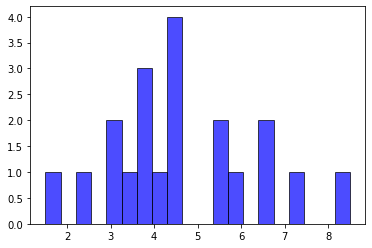

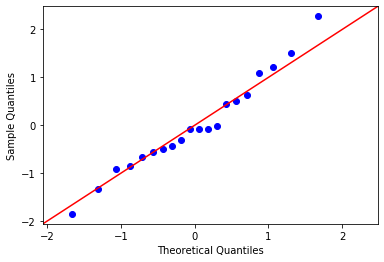

In [27]:
## QQ Plot: all three QQ plots follow the normal line y=x, indicating that the multinormal assumption seem justified.  
# X1: Sweat rate
sweat_rate = [3.7, 5.7, 3.8, 3.2, 3.1, 4.6, 2.4, 7.2, 6.7, 5.4, 3.9, 4.5, 3.5, 4.5, 1.5, 8.5, 4.5, 6.5, 4.1, 5.5]

# normalize the data
mu_hat = (1/len(sweat_rate)) * sum(sweat_rate)
mu_hat
sigma_hat_square = (1/(len(sweat_rate)-1)) * sum([(x_i - mu_hat)**2 for x_i in sweat_rate])
sigma_hat_square

normalized_sweat_rate = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in sweat_rate]

# QQ plot of X1:Sweat rate - the multinormal assumption seem justified 
plt.hist(sweat_rate, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

fig = sm.qqplot(np.array(normalized_sweat_rate), line='45')
plt.show()

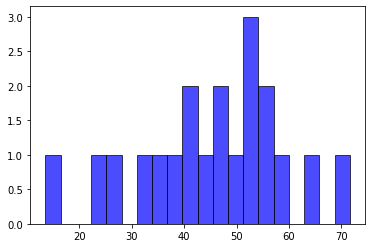

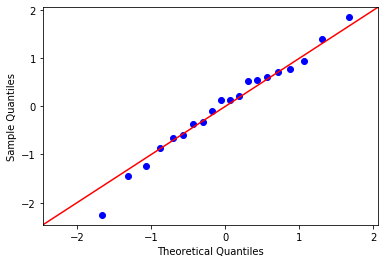

In [28]:
# X2: Sodium
sodium = [48.5, 65.1, 47.2, 53.2, 55.5, 36.1, 24.8, 33.1, 47.4, 54.1, 36.9, 58.8, 27.8, 40.2, 13.5, 56.4, 71.6, 52.8, 44.1, 40.9]

# normalize the data
mu_hat = (1/len(sodium)) * sum(sodium)
mu_hat
sigma_hat_square = (1/(len(sodium)-1)) * sum([(x_i - mu_hat)**2 for x_i in sodium])
sigma_hat_square

normalized_sodium = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in sodium]

# QQ plot of X2:Sodium - the multinormal assumption seem justified 
plt.hist(sodium, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

fig = sm.qqplot(np.array(normalized_sodium), line='45')
plt.show()


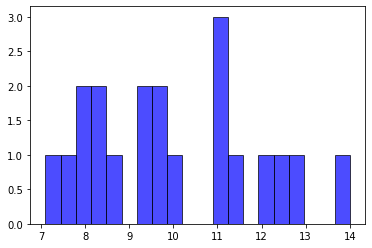

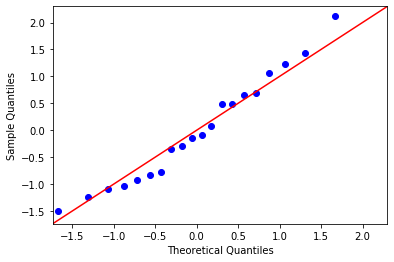

In [29]:
# X3: Potassium
potassium = [9.3, 8.0, 10.9, 12.0, 9.7, 7.9, 14.0, 7.6, 8.5, 11.3, 12.7, 12.3, 9.8, 8.4, 10.1, 7.1, 8.2, 10.9, 11.2, 9.4]

# normalize the data
mu_hat = (1/len(potassium)) * sum(potassium)
mu_hat
sigma_hat_square = (1/(len(potassium)-1)) * sum([(x_i - mu_hat)**2 for x_i in potassium])
sigma_hat_square

normalized_potassium = [(x_i - mu_hat)/sigma_hat_square**(0.5) for x_i in potassium]

# QQ plot of X3:Potassium - the multinormal assumption seem justified 
plt.hist(potassium, bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

fig = sm.qqplot(np.array(normalized_potassium), line='45')
plt.show()


### QQ plot for pairs 

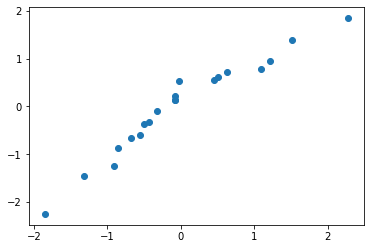

In [30]:
## QQ plots for pairs: three plots indicate that the multinormal assumption seem justified except for the third plot which is a little right-skewed.

sorted_sweat_rate = np.sort(normalized_sweat_rate)
sorted_sodium = np.sort(normalized_sodium)
sorted_potassium = np.sort(normalized_potassium)

# QQ plot of X1,X2
plt.scatter(sorted_sweat_rate, sorted_sodium)


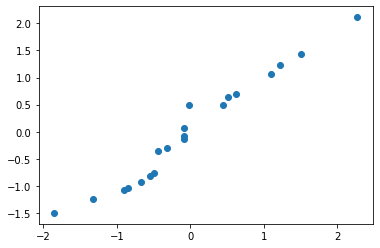

In [31]:
# QQ plot of X1,X3
plt.scatter(sorted_sweat_rate, sorted_potassium)


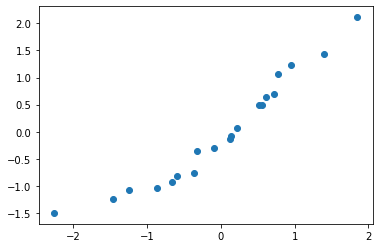

In [32]:
# QQ plot of X2,X3
plt.scatter(sorted_sodium, sorted_potassium)